In [134]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [135]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [136]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Мы видим, что в датасете 506  записей и нет пропущенных значений. Все они вещественные.

Построим матрицу корреляций.

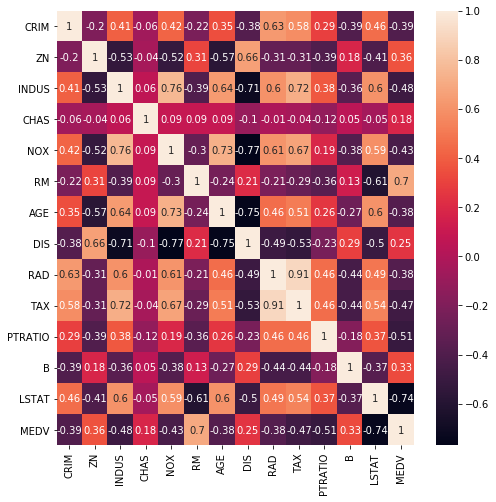

In [181]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True)

Мы видим высокую позитивную корреляцию между MEDV и RM (0,7), а также негативную корреляцию между MEDV и LSTAT (-0,74).

In [139]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

1. Попробуем с помощью линейной регрессии предсказать среднюю цену на дом (MEDV), используя как предикторы RM и LSTAT

Подготавливаем данные и разделяем их на 80% тренировочных и 20% тестовых


In [196]:
X = data[['RM','LSTAT']]
y = data['MEDV'].values.reshape(-1,1)

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2
)

Обучаем модель

In [198]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
predicted_y = model.predict(X_test)

Проверяем ошибку модели (абсолютную и среднеквадратическую ошибку)

In [192]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [200]:
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

35.8491008763316
4.302907531739973


В идеале ошибка модели должна стремиться к нулю. В этой модели абсолютная ошибка около 4, мне кажется, это неплохо.

In [201]:
print(model.coef_)
print(model.intercept_)
#  проверяю коэффициенты

[[ 5.22110233 -0.68112478]]
[-1.55101209]


In [202]:
model.score(X,y)

0.6370610343596987

Чем ближе коэффициент детерминации к 1, тем лучше модель. У нас 0,63, что неплохо, но лучше иметь значения выше 0,8

2. Возьмем для модели все столбцы с данными

In [156]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2
)

In [158]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
predicted_y = model.predict(X_test)
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

31.338214768420897
3.547951069276295


In [160]:
print(model.coef_)
print(model.intercept_)

[-1.08047811e-01  4.69288214e-02  4.29756978e-02  6.38834530e-01
 -1.62315220e+01  3.68154471e+00 -6.84091518e-03 -1.46728585e+00
  3.29514896e-01 -1.56937734e-02 -1.02292170e+00  7.83098798e-03
 -4.94668460e-01]
39.226703680782265


In [161]:
model.score(X,y)

0.7356518987360215

У этой модели коэффициент R^2 уже 0,73, она лучше предыдущей

3. Преобразуем датасет с предикторами.
Из матрицы корреляций видно, что некоторые атрибуты взаимозавимы, например, DIS и NOX (-0,77) и TAX и RAD (0,91). Удалим один из каждой пары

In [203]:
X = data.drop(['MEDV','DIS','TAX'], axis=1)
y = data['MEDV']

In [204]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,1,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,2,17.8,396.9,9.14


In [205]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2
)

In [206]:
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

24.182062631461477
3.6674828251294227


In [207]:
model.score(X,y)

0.7048843028770826

Коэффициент детерминации 0,7, что в целом неплохо, но есть куда стремиться дальше.

4. Несмотря на высокий коэффициент корреляции в матрице, по переменной RM модель не показывает высокого результата

In [167]:
room = data['RM'].values.reshape(-1,1)
medv = data['MEDV'].values.reshape(-1,1)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    room, 
    medv, 
    test_size = 0.2
)

In [171]:
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

In [172]:
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

54.31989234371966
4.676127771573207


In [173]:
print(model.coef_)
print(model.intercept_)

[[9.7600409]]
[-38.74523155]


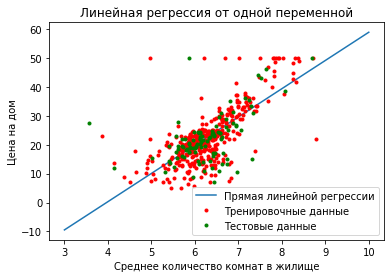

In [174]:
plt.xlabel('Среднее количество комнат в жилище')
plt.ylabel('Цена на дом')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(3, 10)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
# plt.xlim(100,800)
# plt.ylim(0,70)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [175]:
model.score(room,medv)

0.4809560832611445